<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Netflix_OTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Access to google drive, Kaggle and import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [4]:
!kaggle datasets download -d mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file

  0% 0.00/2.16k [00:00<?, ?B/s]
100% 2.16k/2.16k [00:00<00:00, 6.15MB/s]


In [5]:
!unzip '/content/netflix-ott-revenue-and-subscribers-csv-file.zip' && rm '/content/netflix-ott-revenue-and-subscribers-csv-file.zip'

Archive:  /content/netflix-ott-revenue-and-subscribers-csv-file.zip
  inflating: Netflix Revenue.csv     


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Netflix Revenue.csv')
data.tail(5)

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
40,31-03-2022,7867767000,3.350424e+09,2.561831e+09,9.989480e+08,916754000.0,74579000.0,73733000.0,39610000.0,33719000.0,...,11.56,8.37,9.21,NaN,NaN,NaN,NaN,NaN,NaN,"22,16,41,000"
41,30-06-2022,7970141000,3.537863e+09,2.457235e+09,1.030234e+09,907719000.0,73283000.0,72966000.0,39624000.0,34799000.0,...,11.17,8.67,8.83,NaN,NaN,NaN,NaN,NaN,NaN,"22,06,72,000"
42,30-09-2022,7925589000,3.601565e+09,2.375814e+09,1.023945e+09,889037000.0,73387000.0,73534000.0,39936000.0,36228000.0,...,10.81,8.58,8.34,NaN,NaN,NaN,NaN,NaN,NaN,"22,30,85,000"
43,31-12-2022,7852053000,3.594791e+09,2.350135e+09,1.016846e+09,856711000.0,74296000.0,76729000.0,41699000.0,38023000.0,...,10.43,8.30,7.69,NaN,NaN,NaN,NaN,NaN,NaN,"23,07,47,000"
44,31-03-2023,8161503000,3.608645e+09,2.517641e+09,1.070192e+09,933523000.0,74398000.0,77373000.0,41249000.0,39478000.0,...,10.89,8.60,8.03,NaN,NaN,NaN,NaN,NaN,NaN,"23,24,98,000"


## Explorer, Clean and Analysis Data 🧹

In [7]:
data.shape

(45, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         45 non-null     object 
 1   Global Revenue               45 non-null     int64  
 2   UACN Revenue                 17 non-null     float64
 3   EMEA Revenue                 17 non-null     float64
 4   LATM Revenue                 17 non-null     float64
 5   APAC Revenue                 17 non-null     float64
 6   UACN Members                 17 non-null     float64
 7   EMEA  Members                17 non-null     float64
 8   LATM Members                 17 non-null     float64
 9   APAC Members                 17 non-null     float64
 10  UACN RPU                     17 non-null     float64
 11  EMEA RPU                     17 non-null     float64
 12  LATM  RPU                    17 non-null     float64
 13  APAC  RPU             

In [9]:
data.isnull().sum()

Date                            0
Global Revenue                  0
UACN Revenue                   28
EMEA Revenue                   28
LATM Revenue                   28
APAC Revenue                   28
UACN Members                   28
EMEA  Members                  28
LATM Members                   28
APAC Members                   28
UACN RPU                       28
EMEA RPU                       28
LATM  RPU                      28
APAC  RPU                      28
Domestic Members               17
Domestic Revenue               17
International Members          17
International Revenue          17
Domestic Free Trialers         33
Interntaional Free Trialers    33
Netflix Global Users            0
dtype: int64

In [10]:
# Change types to columns

data['Date'] = pd.to_datetime(data['Date'])
data['Netflix Global Users'] = data['Netflix Global Users'].str.replace(",","")
data['Netflix Global Users'] = pd.to_numeric(data['Netflix Global Users'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         45 non-null     datetime64[ns]
 1   Global Revenue               45 non-null     int64         
 2   UACN Revenue                 17 non-null     float64       
 3   EMEA Revenue                 17 non-null     float64       
 4   LATM Revenue                 17 non-null     float64       
 5   APAC Revenue                 17 non-null     float64       
 6   UACN Members                 17 non-null     float64       
 7   EMEA  Members                17 non-null     float64       
 8   LATM Members                 17 non-null     float64       
 9   APAC Members                 17 non-null     float64       
 10  UACN RPU                     17 non-null     float64       
 11  EMEA RPU                     17 non-null     fl

<ipython-input-10-56dd14e93b5d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [11]:
# Create 3 new columns Year,Month,Day from Date column

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [12]:
data['Month_Quarters'] = data['Month'].map({3:"Jan-Mar",6:"Apr-Jun",9:"Jul-Sep",12:"Oct-Dic"})

In [13]:
pv_revenue = pd.pivot_table(
    data, index='Year',
    values =['Global Revenue','UACN Revenue','EMEA Revenue','LATM Revenue','APAC Revenue'],aggfunc='sum',fill_value=0,)

In [14]:
pv_members = pd.pivot_table(data,
                            index='Year',
                            values=['UACN Members','EMEA  Members','LATM Members','APAC Members'],
                            aggfunc='sum', fill_value=0)


In [15]:
pv_rpu = pd.pivot_table(data,index='Year',
                        values=['UACN Members','EMEA  Members','LATM Members','APAC Members'],
                        aggfunc='sum',fill_value=0)


In [16]:
pv_resume = pd.pivot_table(data,index='Year',
                           values=['International Members','International Revenue','Netflix Global Users'],
                           aggfunc='sum',fill_value=0)

## Pivot Tables with Revenue, RPU and Members by Continent 🌏

In [17]:
print("NETFLIX REVENUE💲 \n","\n",pv_revenue,"\n","\n","NETFLIX RPU📊 \n","\n",pv_rpu,"\n",
      "\n","NETFLIX MEMBERS👨‍👦‍👦 \n","\n",pv_members,"\n","\n",
      "SUMARIZE OF MEMBERS AND REVENUE 👨‍👦‍👦💲","\n\n",pv_resume)

NETFLIX REVENUE💲 
 
       APAC Revenue  EMEA Revenue  Global Revenue  LATM Revenue  UACN Revenue
Year                                                                        
2012             0             0      3609282000             0             0
2013             0             0      4374562000             0             0
2014             0             0      5504656000             0             0
2015             0             0      6779511000             0             0
2016             0             0      8830669000             0             0
2017             0             0     11692713000             0             0
2018             0             0     15794341000             0             0
2019    1469521000    5543067000     20156447000    2795434000   10051208000
2020    2372300000    7772252000     24996056000    3156727000   11455396000
2021    3266601000    9699819000     29697844000    3576976000   12972100000
2022    3570221000    9745015000     31615550000    406

# Plotting some insights

## Revenue 💲

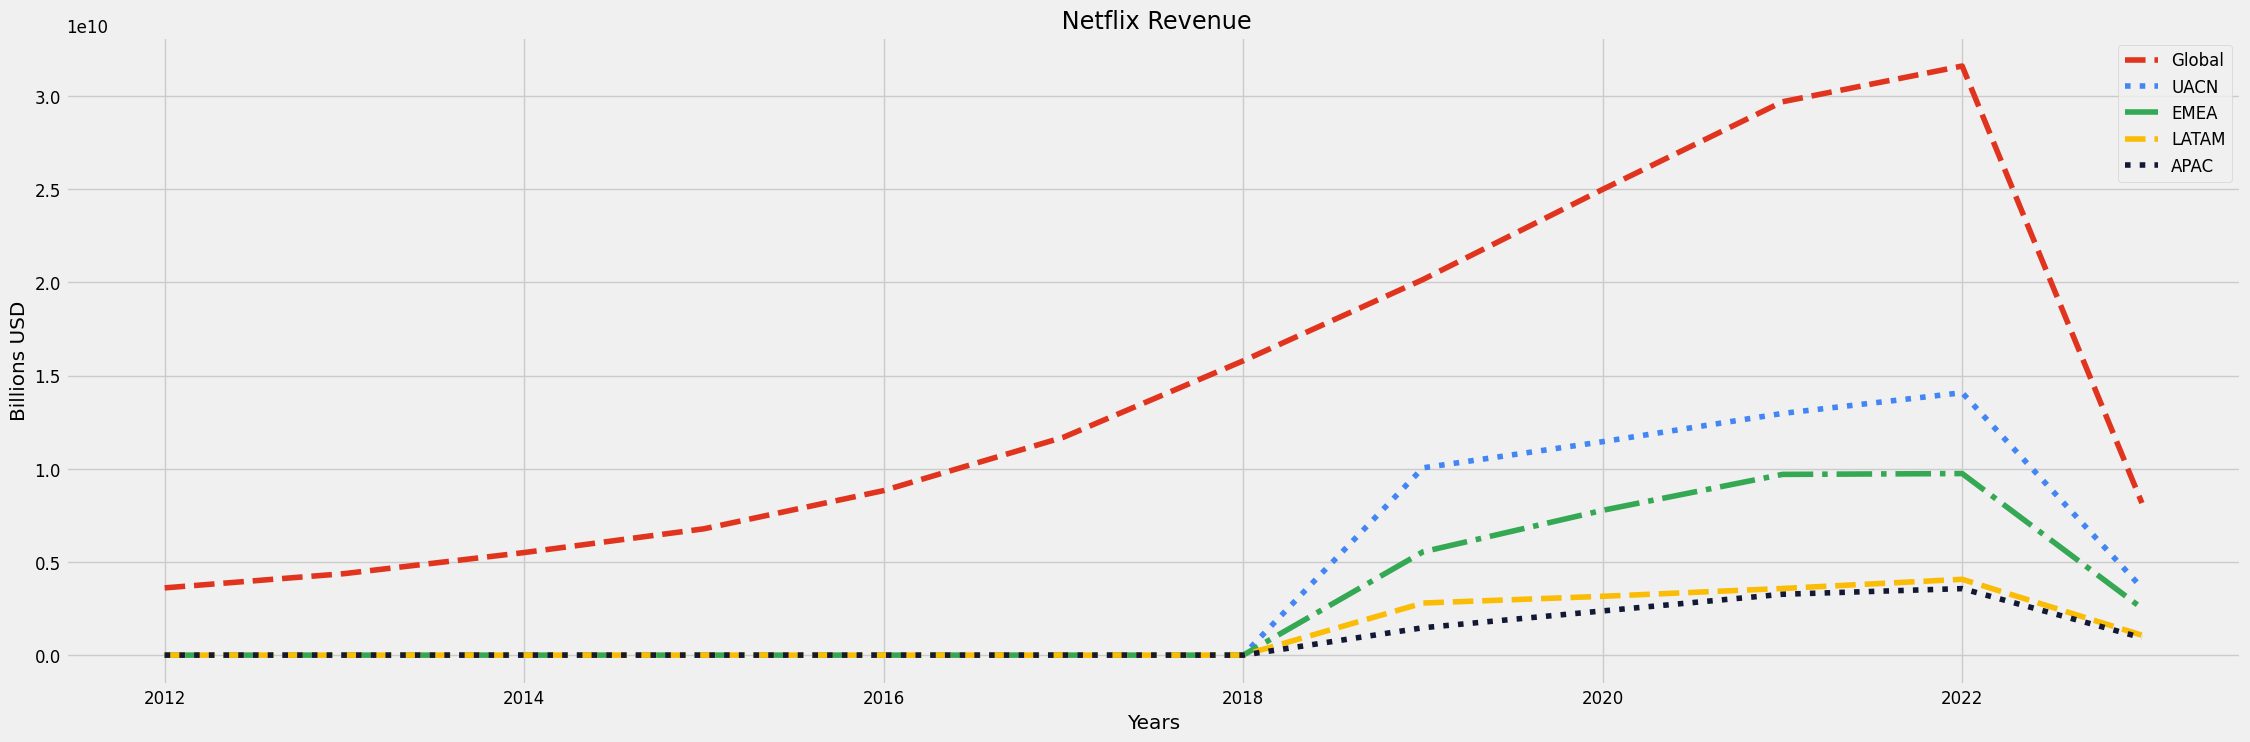

In [114]:
a = data.groupby(['Year'])['Global Revenue'].sum()
b = data.groupby(['Year'])['UACN Revenue'].sum()
c = data.groupby(['Year'])['EMEA Revenue'].sum()
d = data.groupby(['Year'])['LATM Revenue'].sum()
e = data.groupby(['Year'])['APAC Revenue'].sum()

plt.figure(figsize=(25,8))

plt.plot(a.index,a.values,label="Global",linestyle='dashed', color="#E1341E")
plt.plot(b.index,b.values,label="UACN",linestyle='dotted',color="#4285F4")
plt.plot(c.index,c.values,label="EMEA",linestyle='dashdot',color="#34A853")
plt.plot(d.index,d.values,label="LATAM",linestyle='dashed',color="#FBBC05")
plt.plot(e.index,e.values,label="APAC",linestyle='dotted',color="#131834")







plt.title(" Netflix Revenue")
plt.ylabel("Billions USD")
plt.xlabel("Years")
plt.legend()

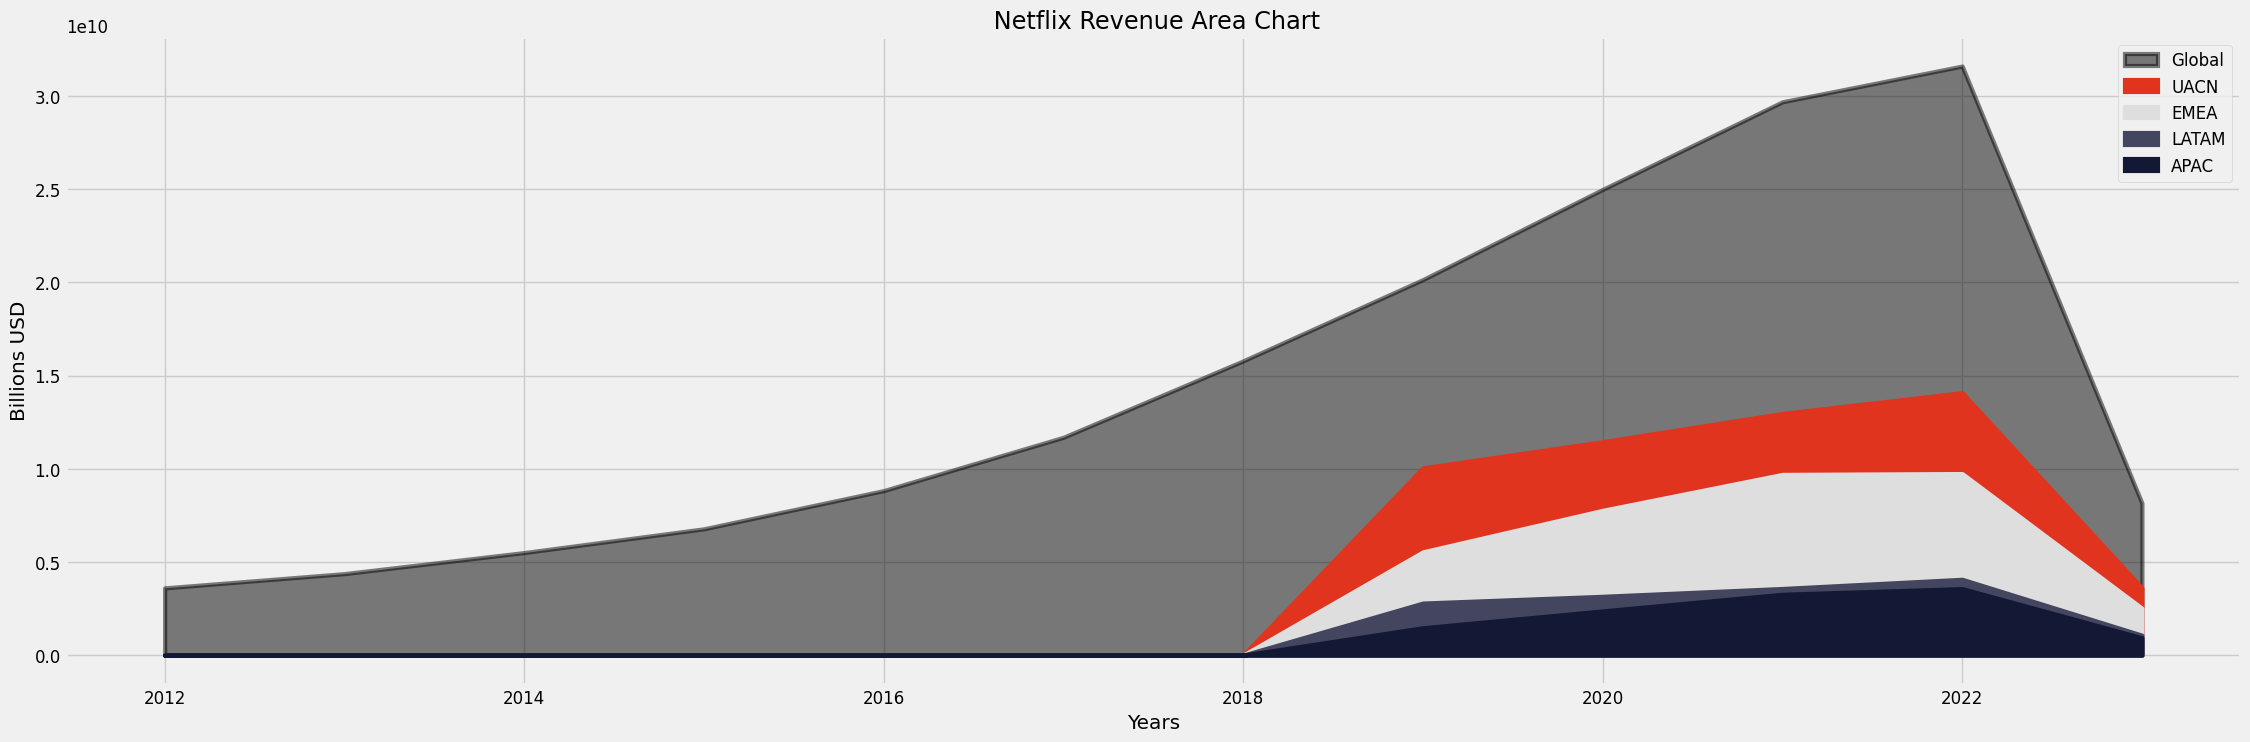

In [113]:
a = data.groupby(['Year'])['Global Revenue'].sum()
b = data.groupby(['Year'])['UACN Revenue'].sum()
c = data.groupby(['Year'])['EMEA Revenue'].sum()
d = data.groupby(['Year'])['LATM Revenue'].sum()
e = data.groupby(['Year'])['APAC Revenue'].sum()

plt.figure(figsize=(25,8))

plt.fill_between(a.index,a.values,label="Global",color="#000000",alpha=.5,lw=3)
plt.fill_between(b.index,b.values,label="UACN",color="#E1341E",lw=3)
plt.fill_between(c.index,c.values,label="EMEA",color="#DEDEDE",lw=3)
plt.fill_between(d.index,d.values,label="LATAM",color="#43465E",lw=3)
plt.fill_between(e.index,e.values,label="APAC",color="#131834",lw=3)


plt.title(" Netflix Revenue Area Chart")
plt.ylabel("Billions USD")
plt.xlabel("Years")
plt.legend()

In [20]:
dfb = data[['UACN Revenue','EMEA Revenue','LATM Revenue','APAC Revenue']]
dfb = dfb.dropna()

Text(0, 0.5, 'Billions USD')

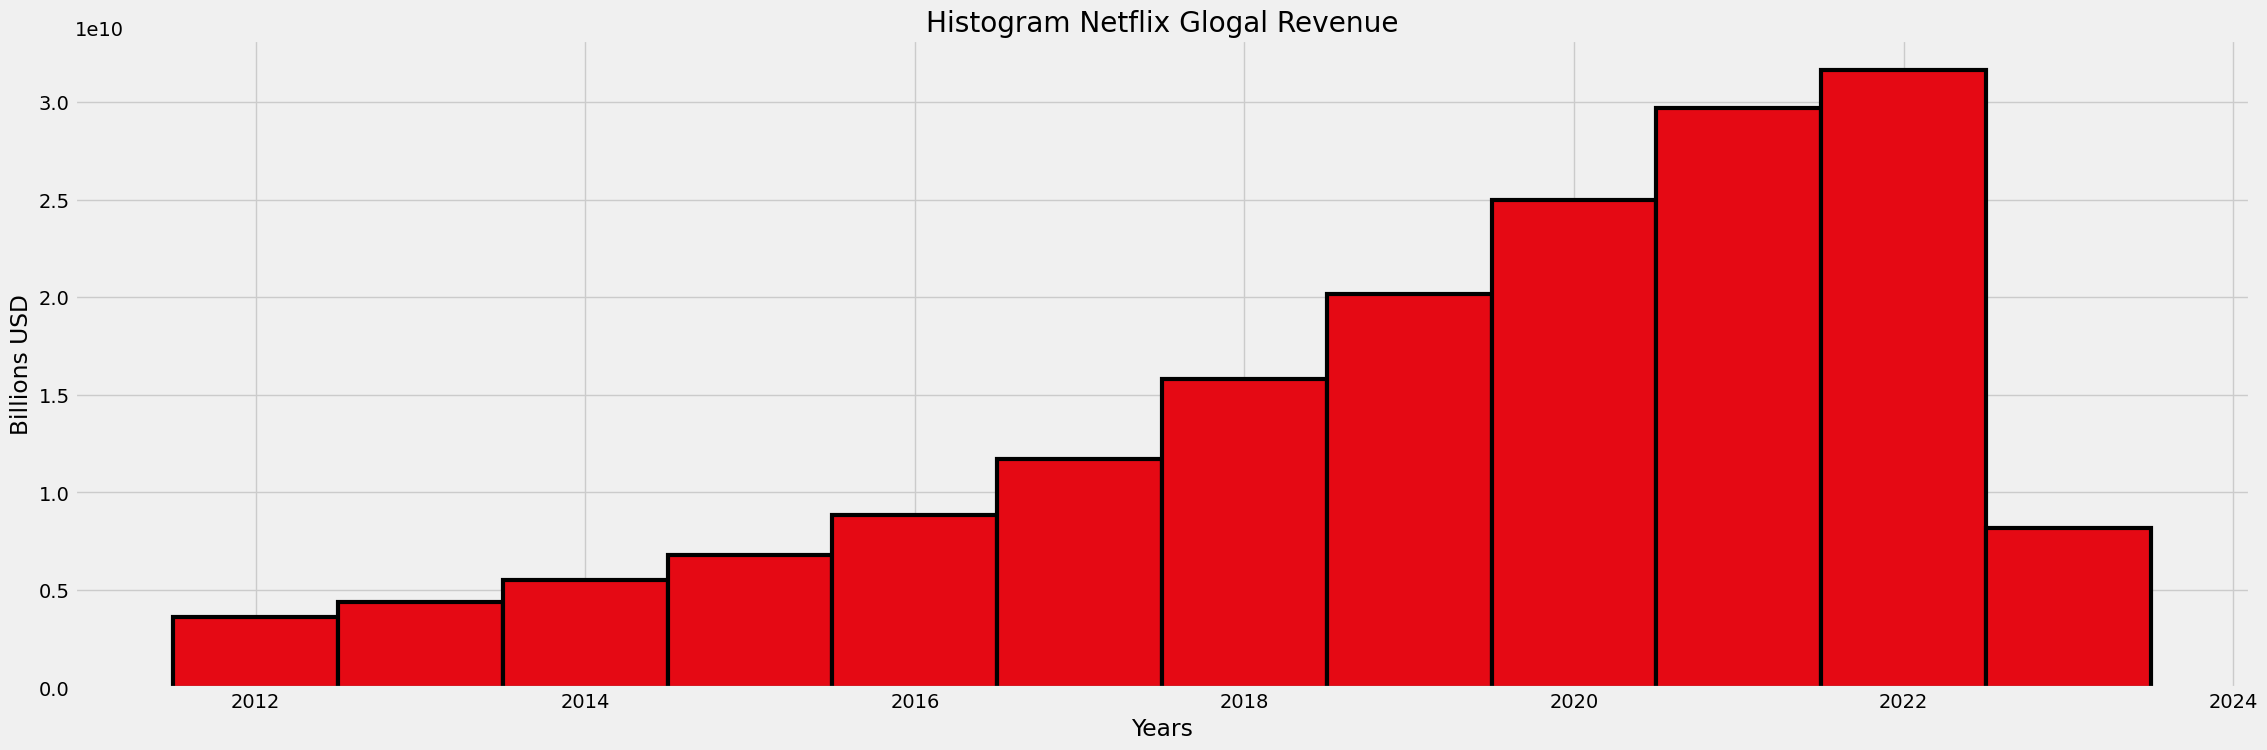

In [21]:
dt= data.groupby(['Year'])['Global Revenue'].sum()

plt.figure(figsize=(25,8))
plt.bar(dt.index,dt.values,width=1,edgecolor="#000000", color="#E50914", linewidth=3)
plt.title("Histogram Netflix Glogal Revenue")
plt.xlabel("Years")
plt.ylabel("Billions USD")

Text(0, 0.5, 'Billios USD')

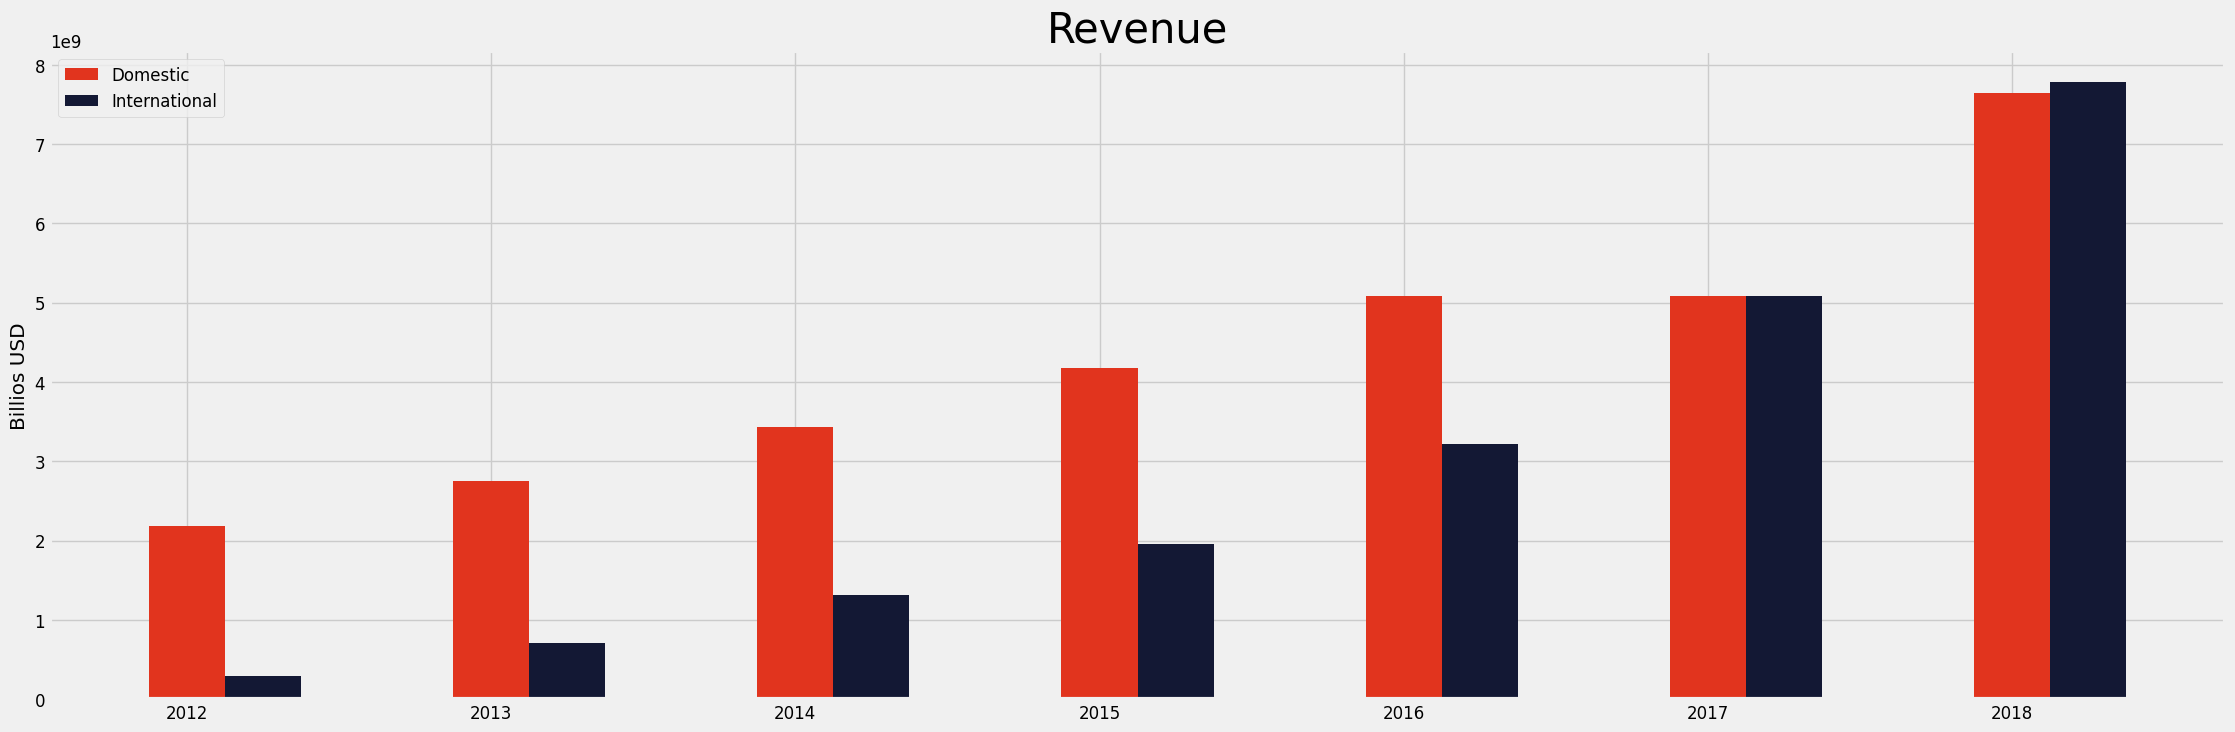

In [98]:
gr = data.groupby(['Year'])['Domestic Revenue'].sum().nlargest(7)
ir = data.groupby(['Year'])['International Revenue'].sum().nlargest(7)


plt.figure(figsize=(25,8))
plt.bar(gr.index,gr.values, color="#E1341E", label="Domestic", width=.25)
plt.bar(ir.index +0.25,ir.values,color="#131834", label="International", width=.25)
plt.legend()
plt.title("Revenue", fontsize=30)
plt.ylabel("Billios USD")


In [55]:
data.columns

Index(['Date', 'Global Revenue', 'UACN Revenue', 'EMEA Revenue',
       'LATM Revenue', 'APAC Revenue', 'UACN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UACN RPU', 'EMEA RPU', 'LATM  RPU',
       'APAC  RPU', 'Domestic Members', 'Domestic Revenue',
       'International Members', 'International Revenue',
       'Domestic Free Trialers', 'Interntaional Free Trialers',
       'Netflix Global Users', 'Year', 'Month', 'Month_Quarters'],
      dtype='object')

<ipython-input-99-1d38eb0278ac>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['UACN Revenue','EMEA Revenue','LATM Revenue','APAC Revenue'])


Text(0.5, 0, 'Billions')

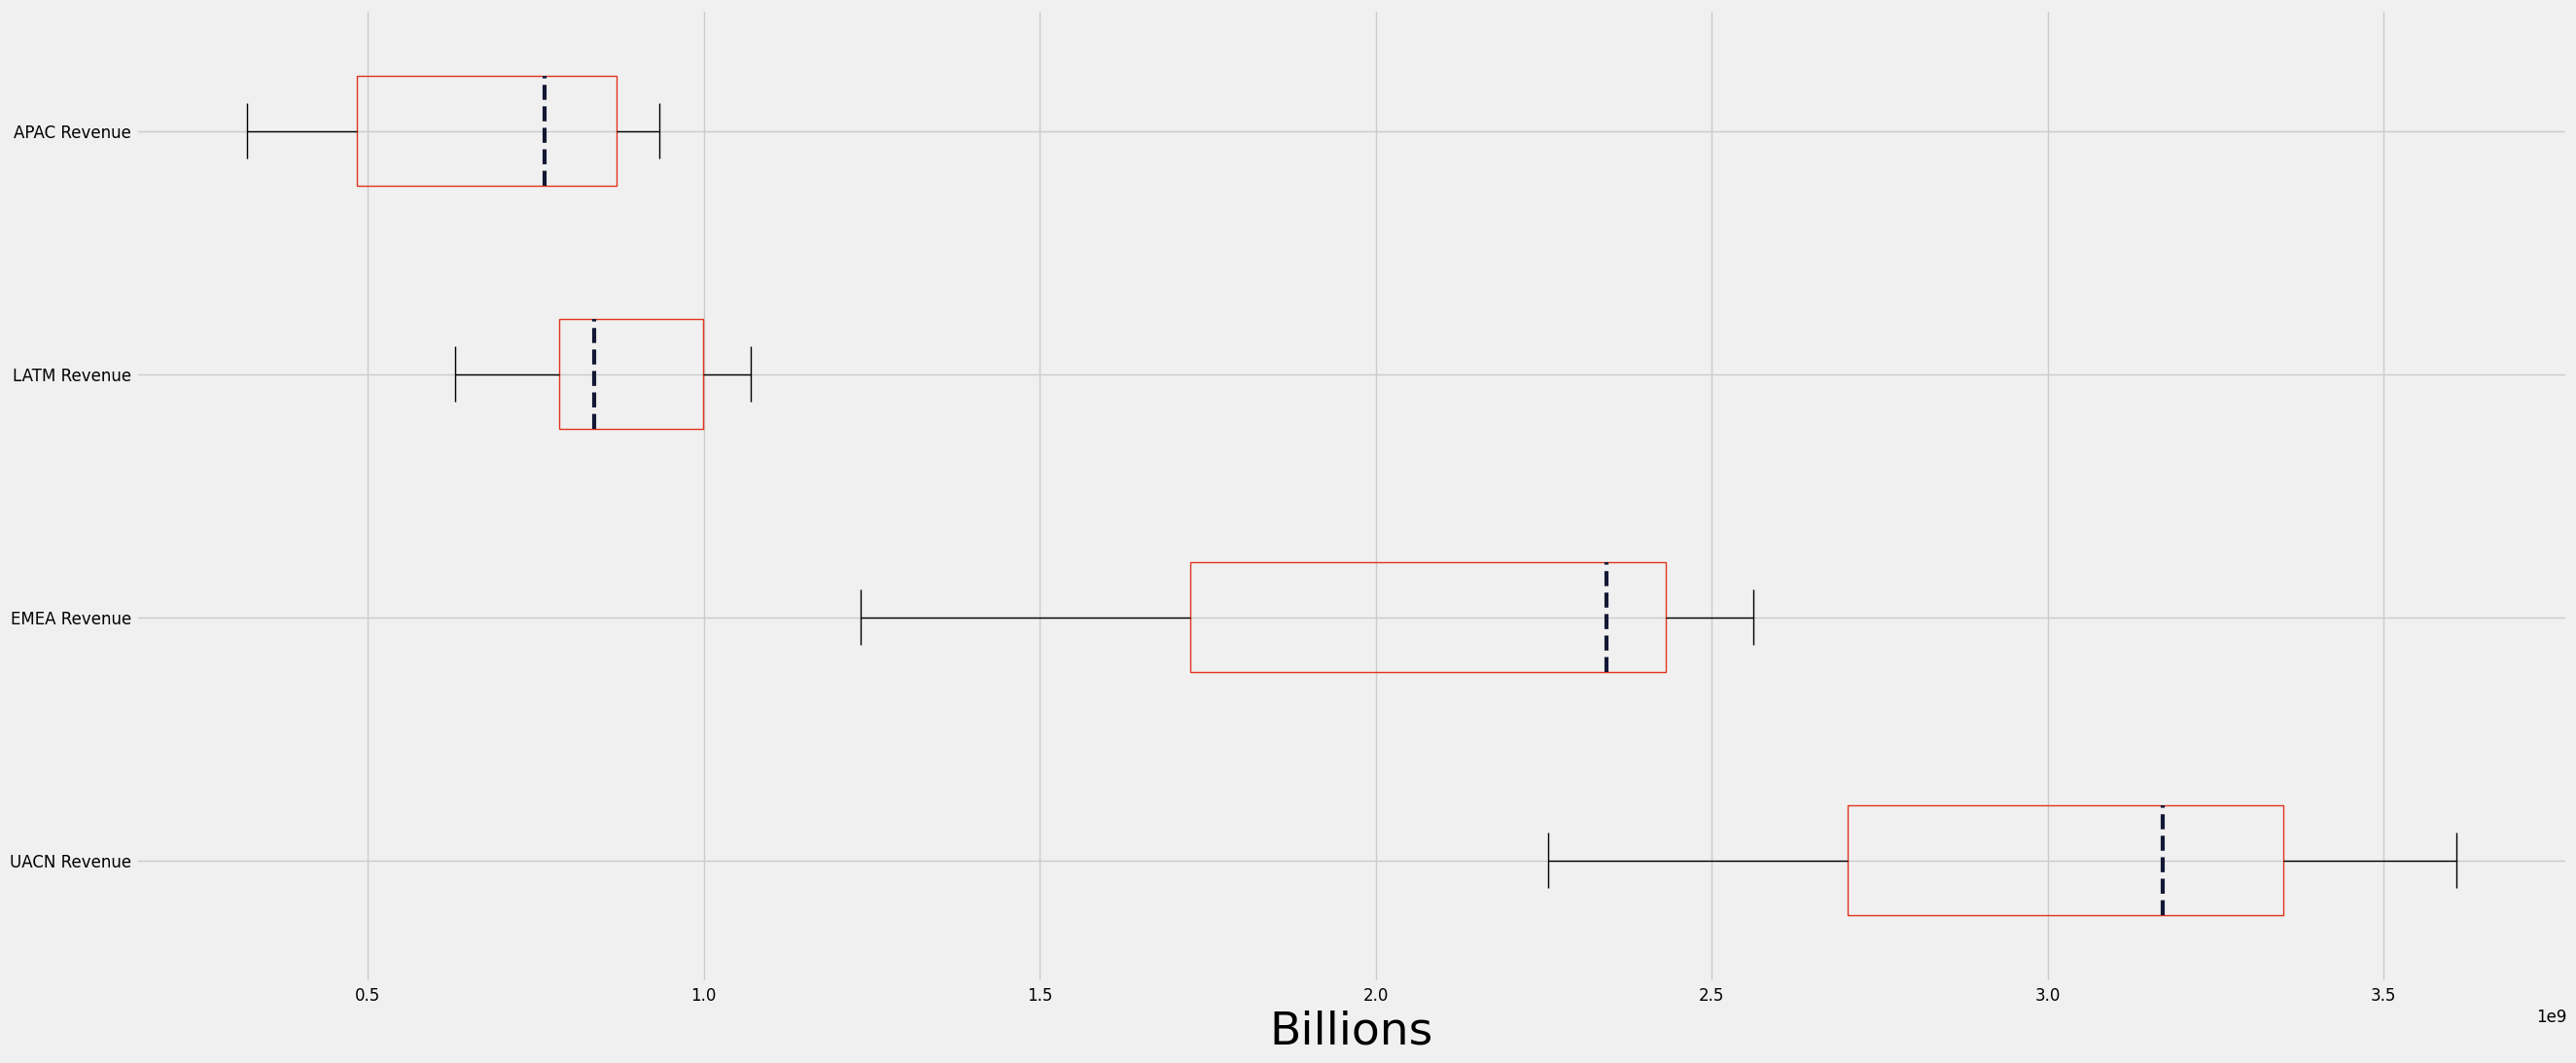

In [99]:
ar = dfb['UACN Revenue']
br = dfb['EMEA Revenue']
cr = dfb['LATM Revenue']
dr = dfb['APAC Revenue']
br = [ar,br,cr,dr]

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

medianprops = dict(linestyle='--', linewidth=3, color='#131834')
bbox_props = dict(color = "#E1341E" )

ax.set_yticklabels(['UACN Revenue','EMEA Revenue','LATM Revenue','APAC Revenue'])
bpx = ax.boxplot(br, vert=0, showfliers=True, medianprops=medianprops, boxprops=bbox_props)
plt.xlabel("Billions", fontsize=34)

# RPU (Renevue Per User) by Region 💲 👪

In [104]:
dfr = data[['UACN RPU','EMEA RPU','LATM  RPU','APAC  RPU']]
dfr = dfr.dropna()

Text(0, 0.5, 'USD')

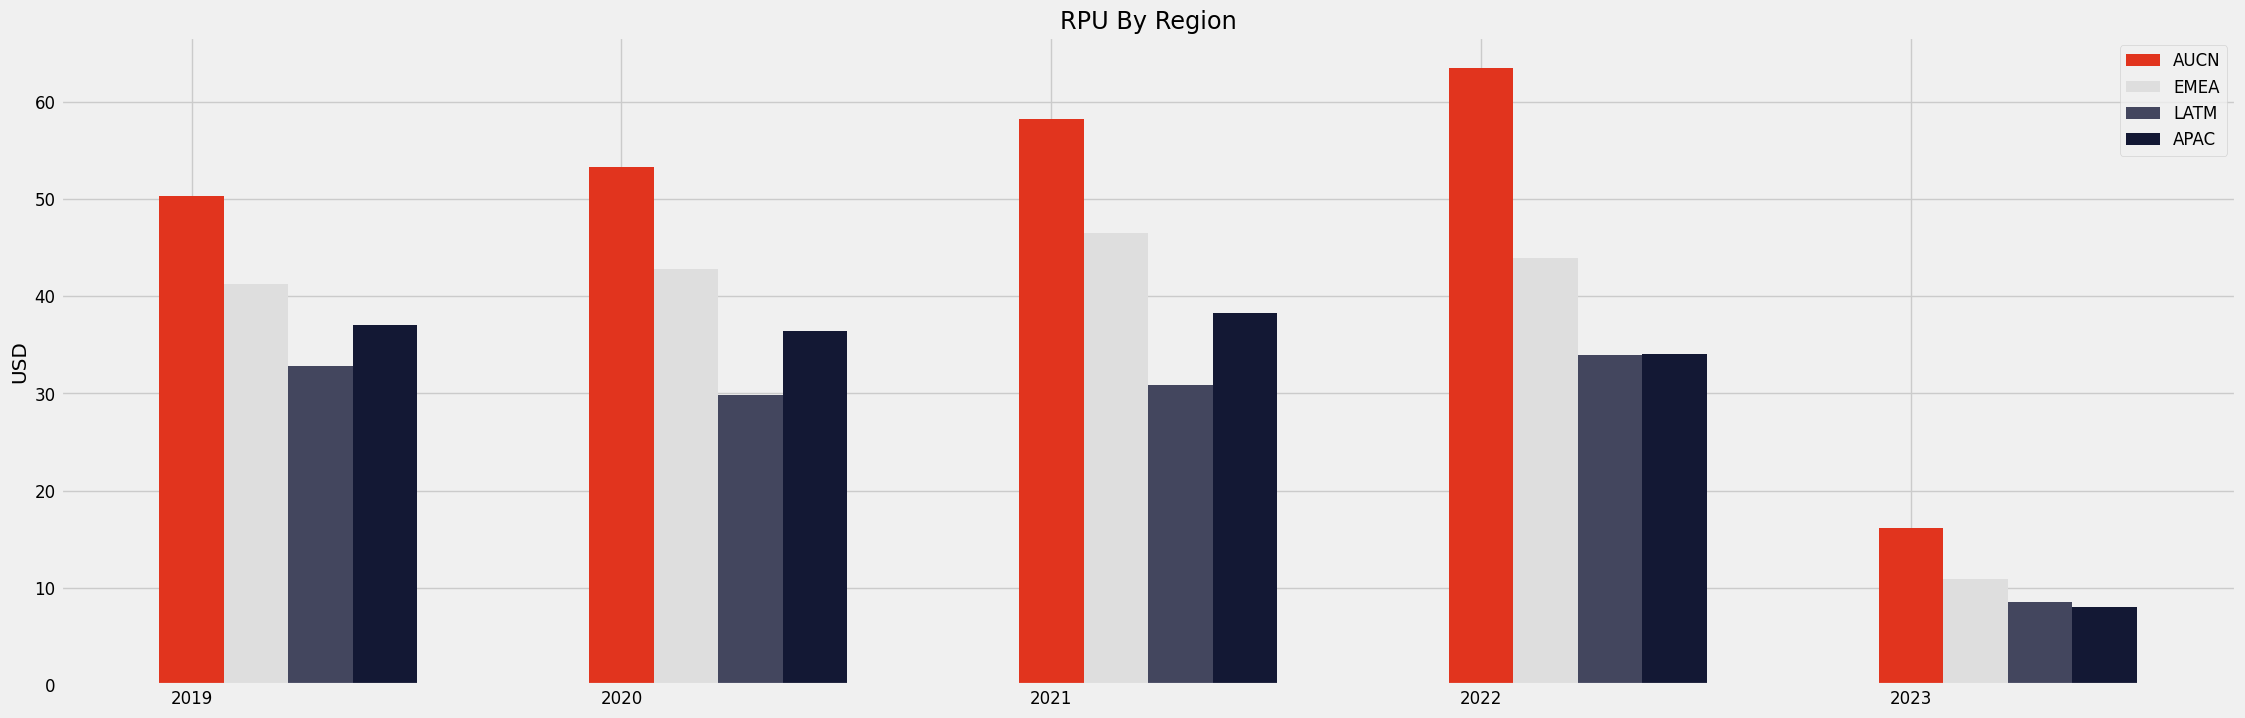

In [49]:
ar = data.groupby(['Year'])['UACN RPU'].sum().nlargest(5,keep="last")
br = data.groupby(['Year'])['EMEA RPU'].sum().nlargest(5,keep="last")
cr = data.groupby(['Year'])['LATM  RPU'].sum().nlargest(5,keep="last")
dr = data.groupby(['Year'])['APAC  RPU'].sum().nlargest(5,keep="last")

plt.figure(figsize=(25,8))
plt.bar(ar.index +.0, ar.values,color="#E1341E",label="AUCN",width=0.15)
plt.bar(br.index +.15, br.values,color="#DEDEDE",label="EMEA",width=0.15)
plt.bar(cr.index +.30, cr.values,color="#43465E",label="LATM",width=0.15)
plt.bar(dr.index +.45, dr.values,color="#131834",label="APAC",width=0.15)

plt.legend()
plt.title("RPU By Region")
plt.ylabel("USD")


Text(0.5, 1.0, 'Partitipation RPU by Region')

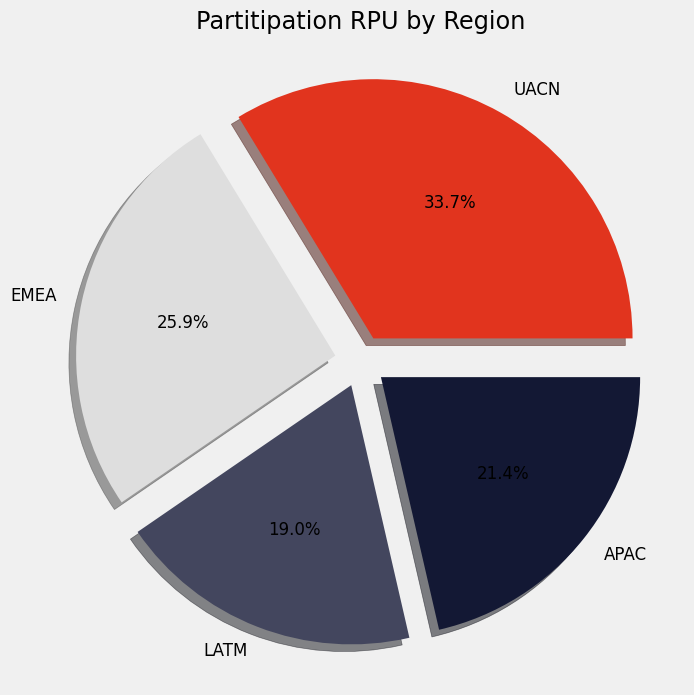

In [97]:
datar = [241,185,136,153]
labels = ['UACN','EMEA','LATM','APAC']
colors =['#E1341E','#DEDEDE','#43465E','#131834']
explode = [0.1,0.1,0.1,0.1]

plt.figure(figsize=(8,8))
plt.pie(datar,labels=labels, colors=colors, explode=explode, autopct='%.1f%%', shadow=True)
plt.title('Participation RPU by Region')

<ipython-input-105-cbe5fdccdec3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['UACN RPU','EMEA RPU','LATM RPU','APAC RPU'])


Text(0.5, 0, 'Billions')

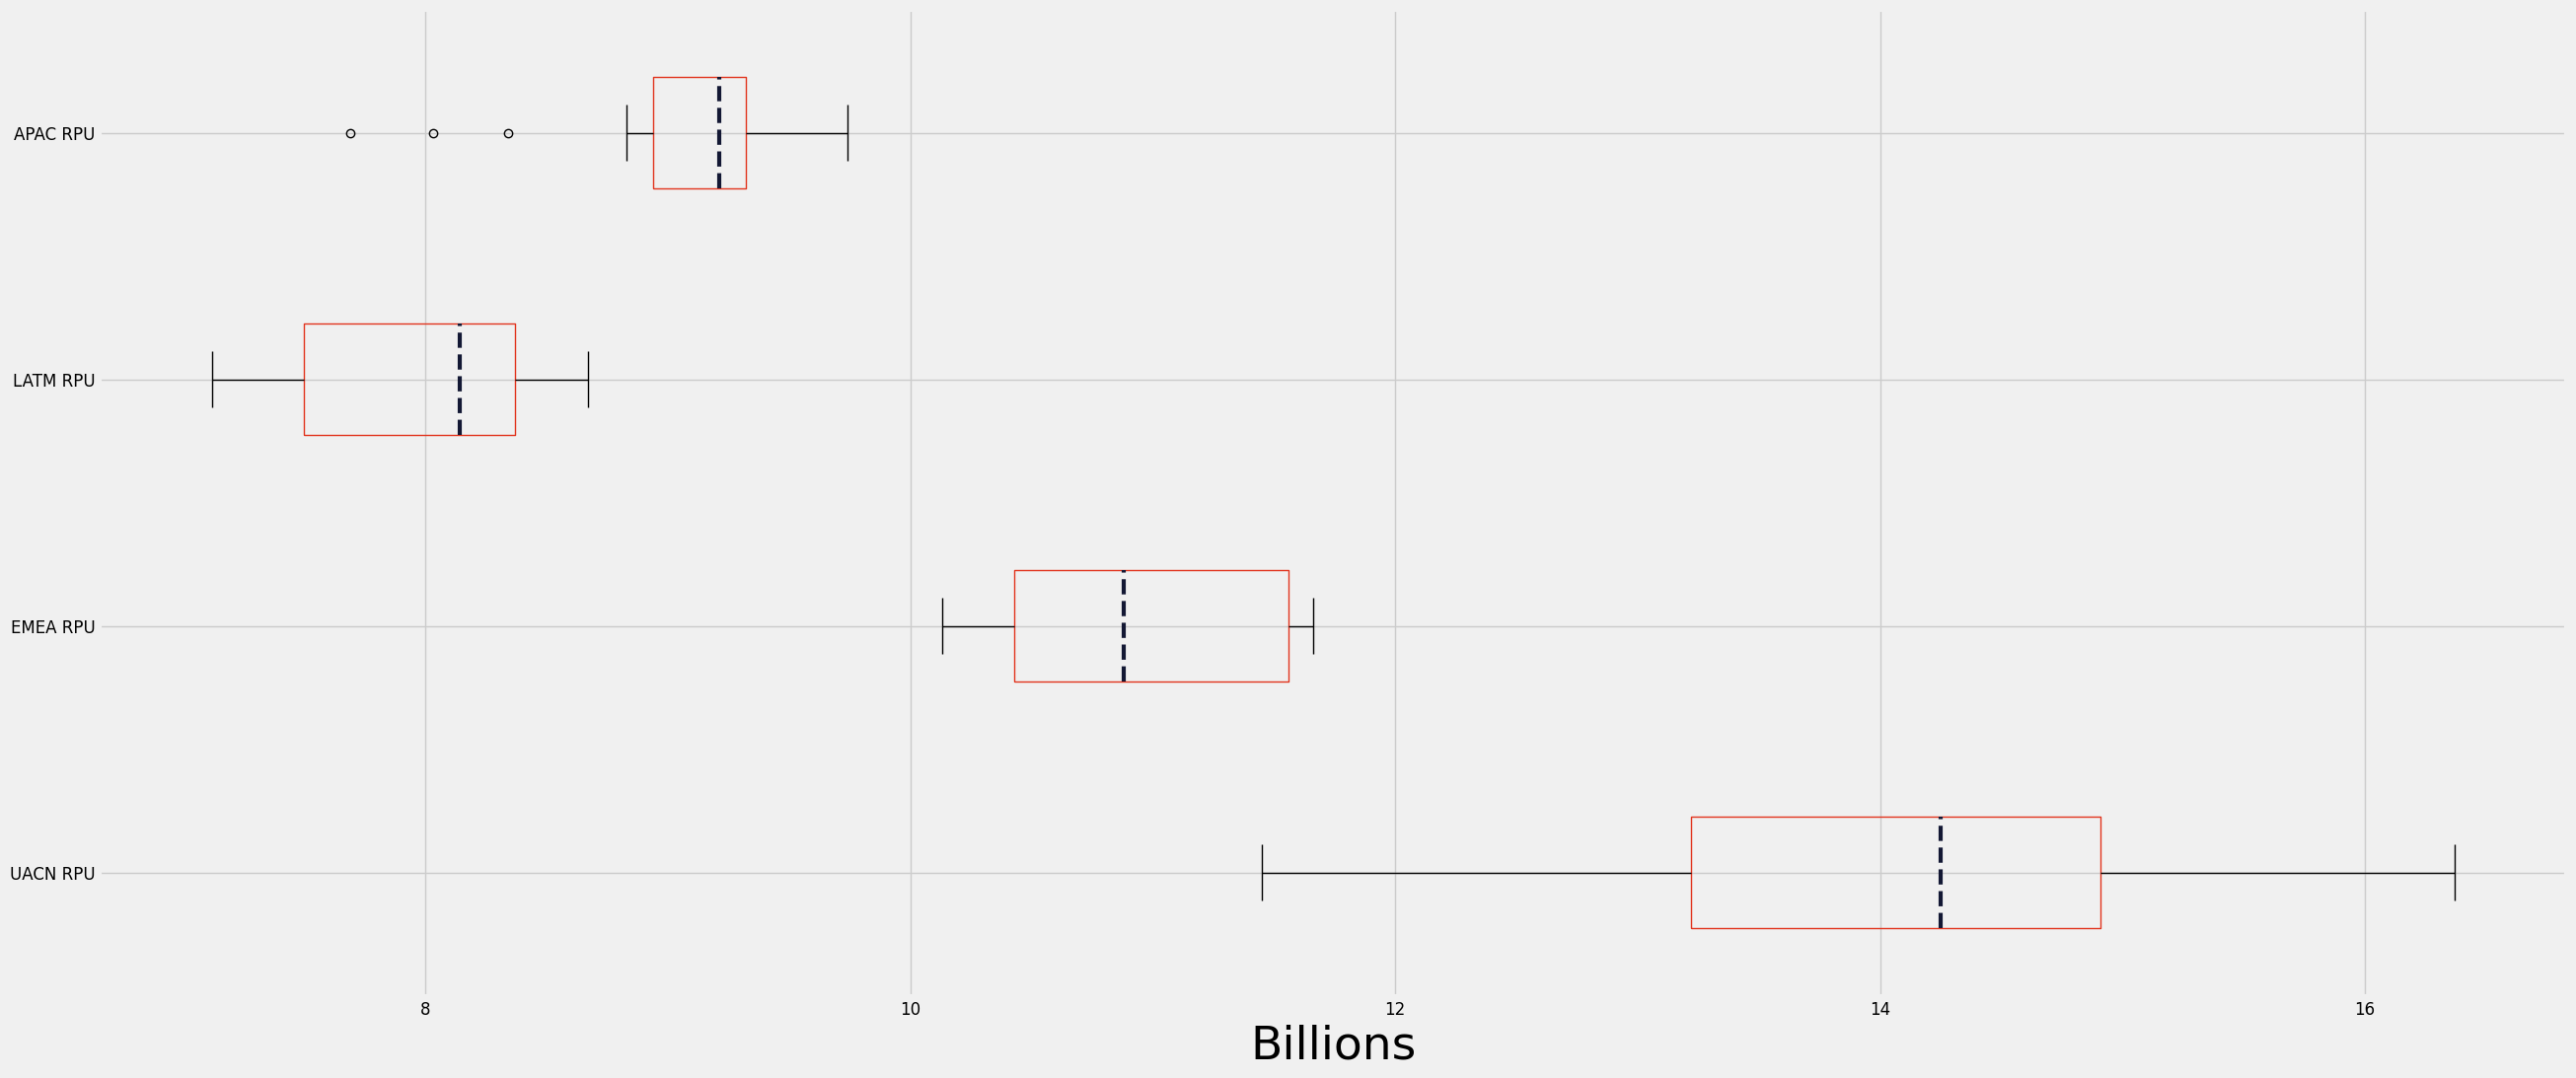

In [105]:
arp= dfr['UACN RPU']
brp= dfr['EMEA RPU']
crp= dfr['LATM  RPU']
drp= dfr['APAC  RPU']
datarpu = [arp,brp,crp,drp]

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

medianprops = dict(linestyle='--', linewidth=3, color='#131834')
bbox_props = dict(color = "#E1341E" )

ax.set_yticklabels(['UACN RPU','EMEA RPU','LATM RPU','APAC RPU'])
bpx = ax.boxplot(datarpu, vert=0, showfliers=True, medianprops=medianprops, boxprops=bbox_props)
plt.xlabel("Billions", fontsize=34)

## Members of Netflix by Region 👪

In [25]:
dfm = data[['UACN Members','EMEA  Members','LATM Members','APAC Members']]
dfm = dfm.dropna()

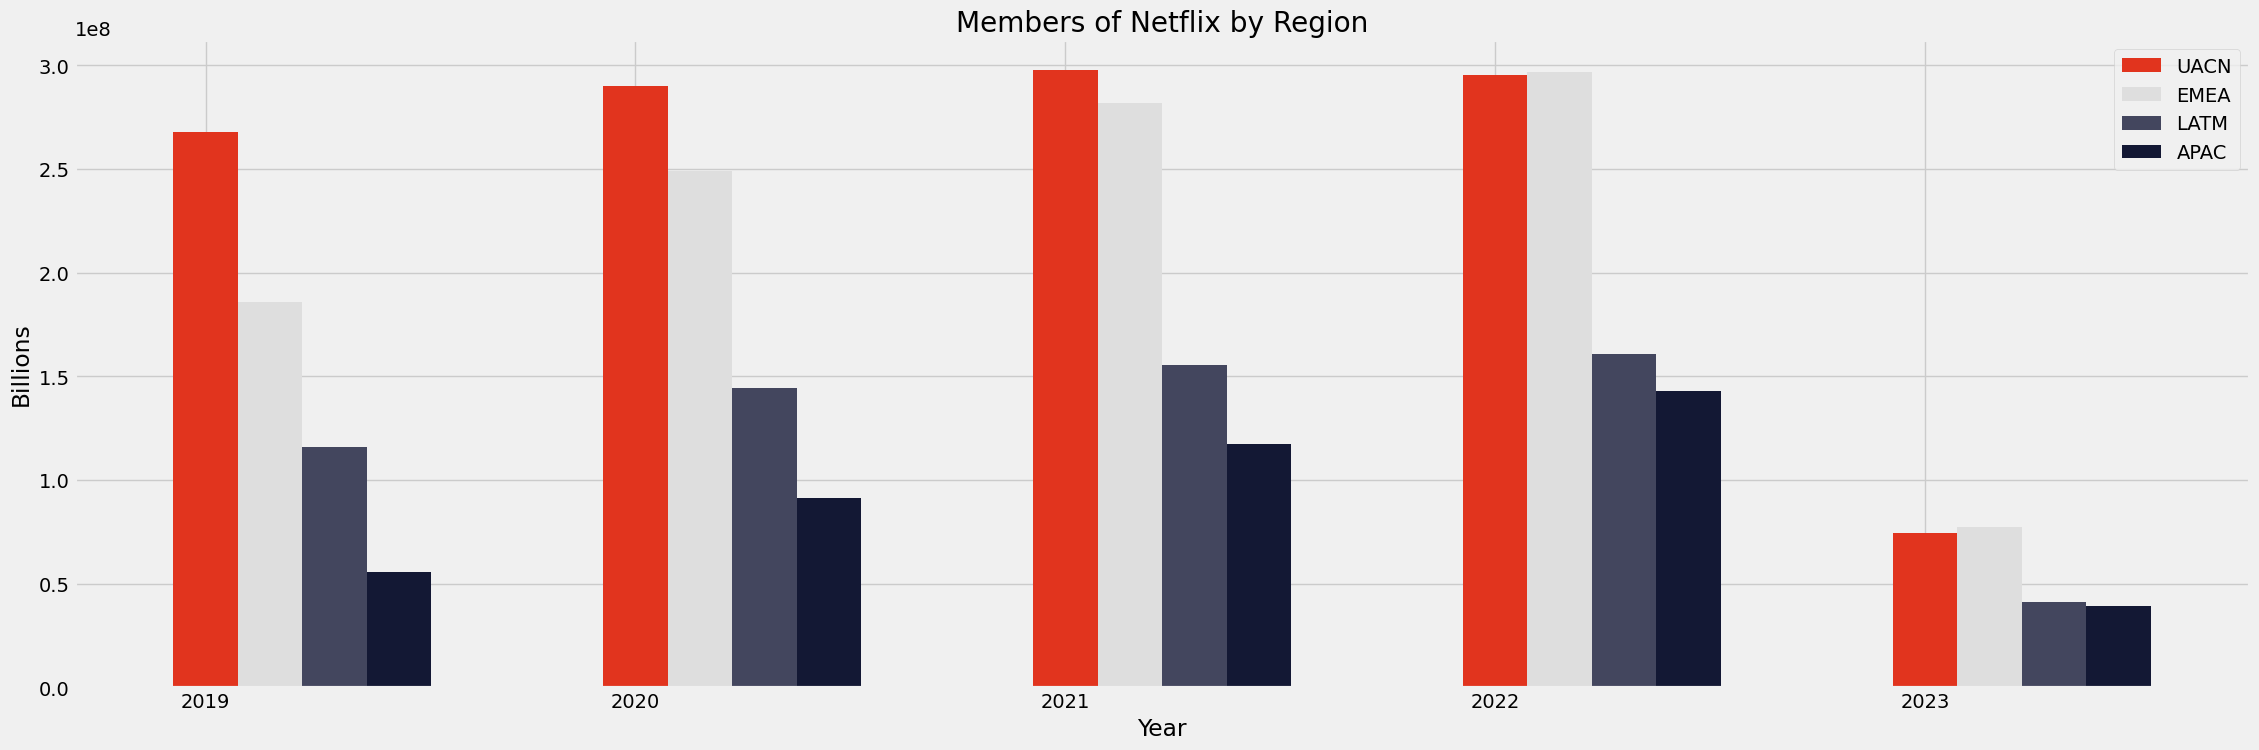

In [22]:
a = data.groupby(['Year'])['UACN Members'].sum().nlargest(5,keep='last')
b = data.groupby(['Year'])['EMEA  Members'].sum().nlargest(5,keep='last')
c = data.groupby(['Year'])['LATM Members'].sum().nlargest(5,keep='last')
d = data.groupby(['Year'])['APAC Members'].sum().nlargest(5,keep='last')


plt.figure(figsize=(25,8))
plt.bar(a.index + .0, a.values, label="UACN", color='#E1341E', width=0.15)
plt.bar(b.index + .15, b.values, label="EMEA", color='#dedede', width=0.15)
plt.bar(c.index + .30, c.values, label="LATM", color='#43465E', width=0.15)
plt.bar(d.index + .45, d.values, label="APAC", color='#131834', width=0.15)


plt.title("Members of Netflix by Region")
plt.xlabel("Year")
plt.ylabel("Billions")
plt.legend()


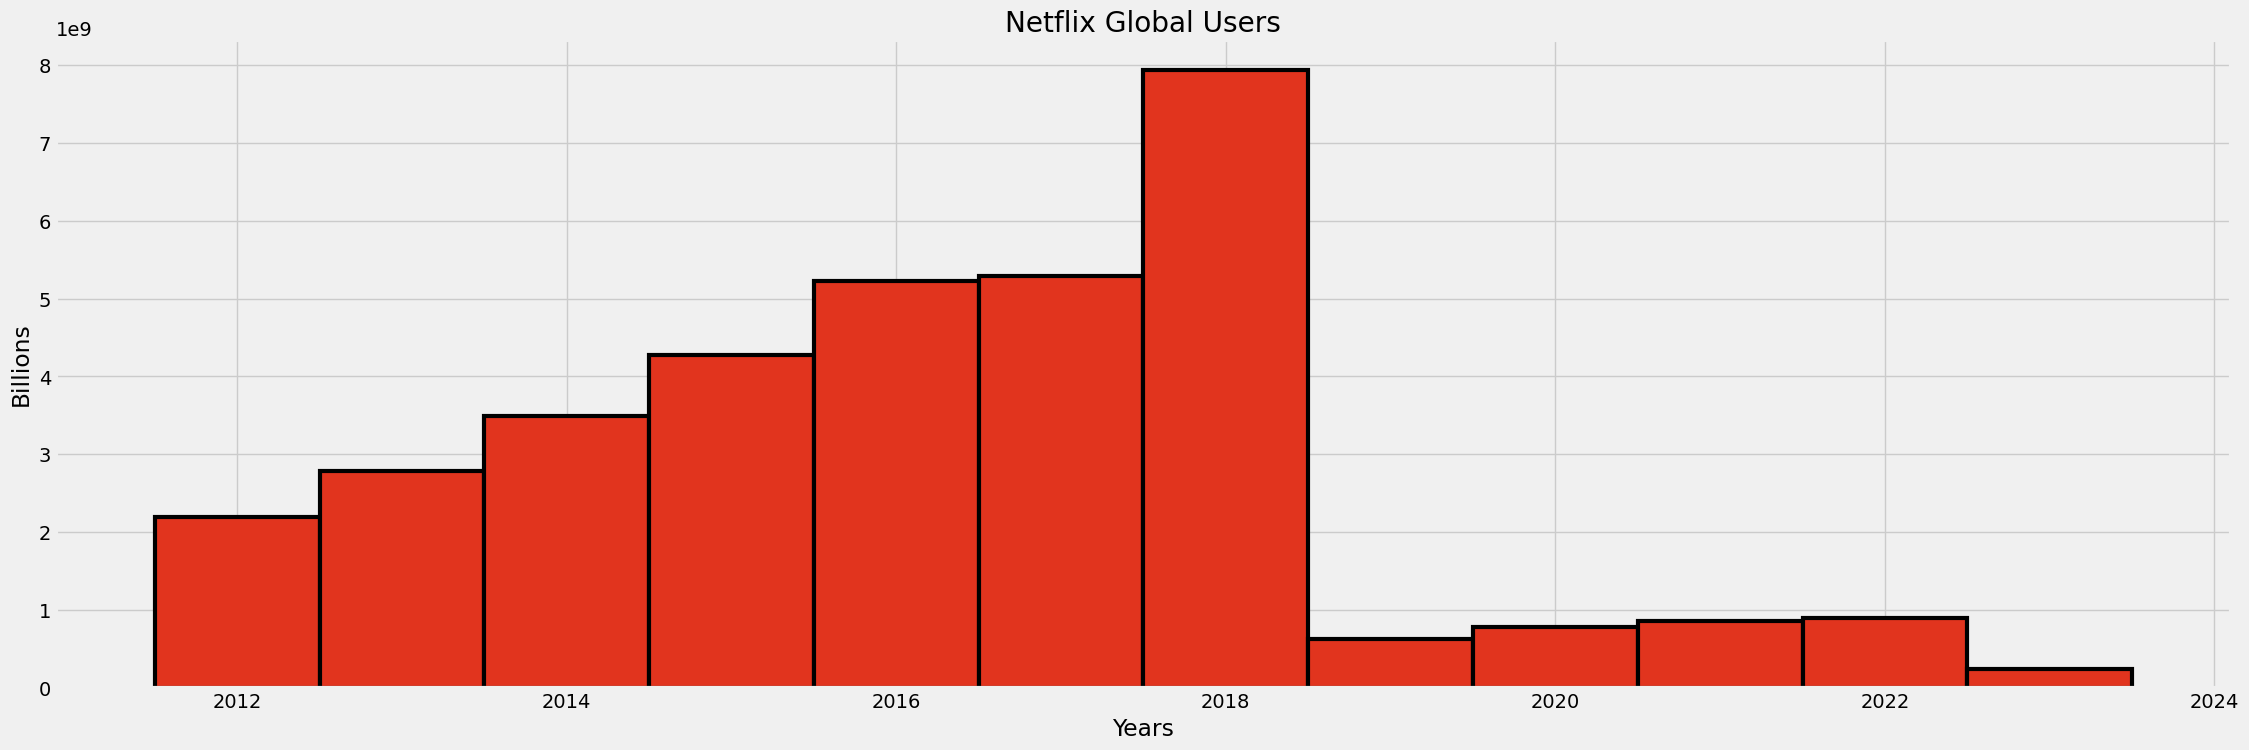

In [23]:
e = data.groupby(['Year'])['Netflix Global Users'].sum()

plt.figure(figsize=(25,8))
plt.bar(e.index, e.values, color='#E1341E', edgecolor="#000000", linewidth=3, width=1)
plt.title("Netflix Global Users")
plt.xlabel("Years")
plt.ylabel("Billions")
plt.show()

Text(0.5, 1.0, 'Participation by region')

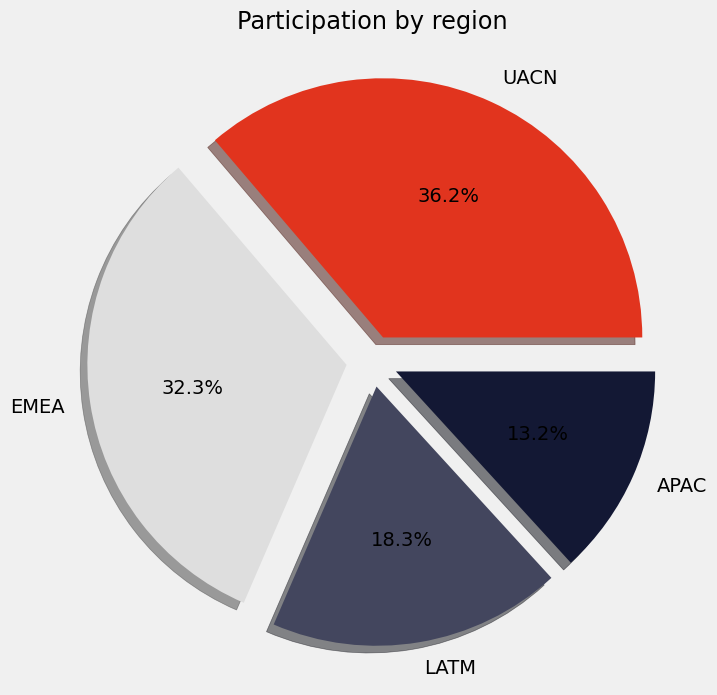

In [24]:
datam = [1225317000,1091136000,618100000,446782000]
labels = ['UACN','EMEA','LATM','APAC']
colors =['#E1341E','#DEDEDE','#43465E','#131834']
explode = [0.1,0.1,0.1,0.1]

plt.figure(figsize=(8,8))
plt.pie(datam,labels=labels,colors=colors, autopct='%.1f%%', shadow=True, explode=explode)
plt.rc('font', size=12)
plt.title("Participation by region")


<ipython-input-106-c243b7df8c32>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['UACN Members','EMEA  Members','LATM Members','APAC Members'])


Text(0.5, 0, 'Billions')

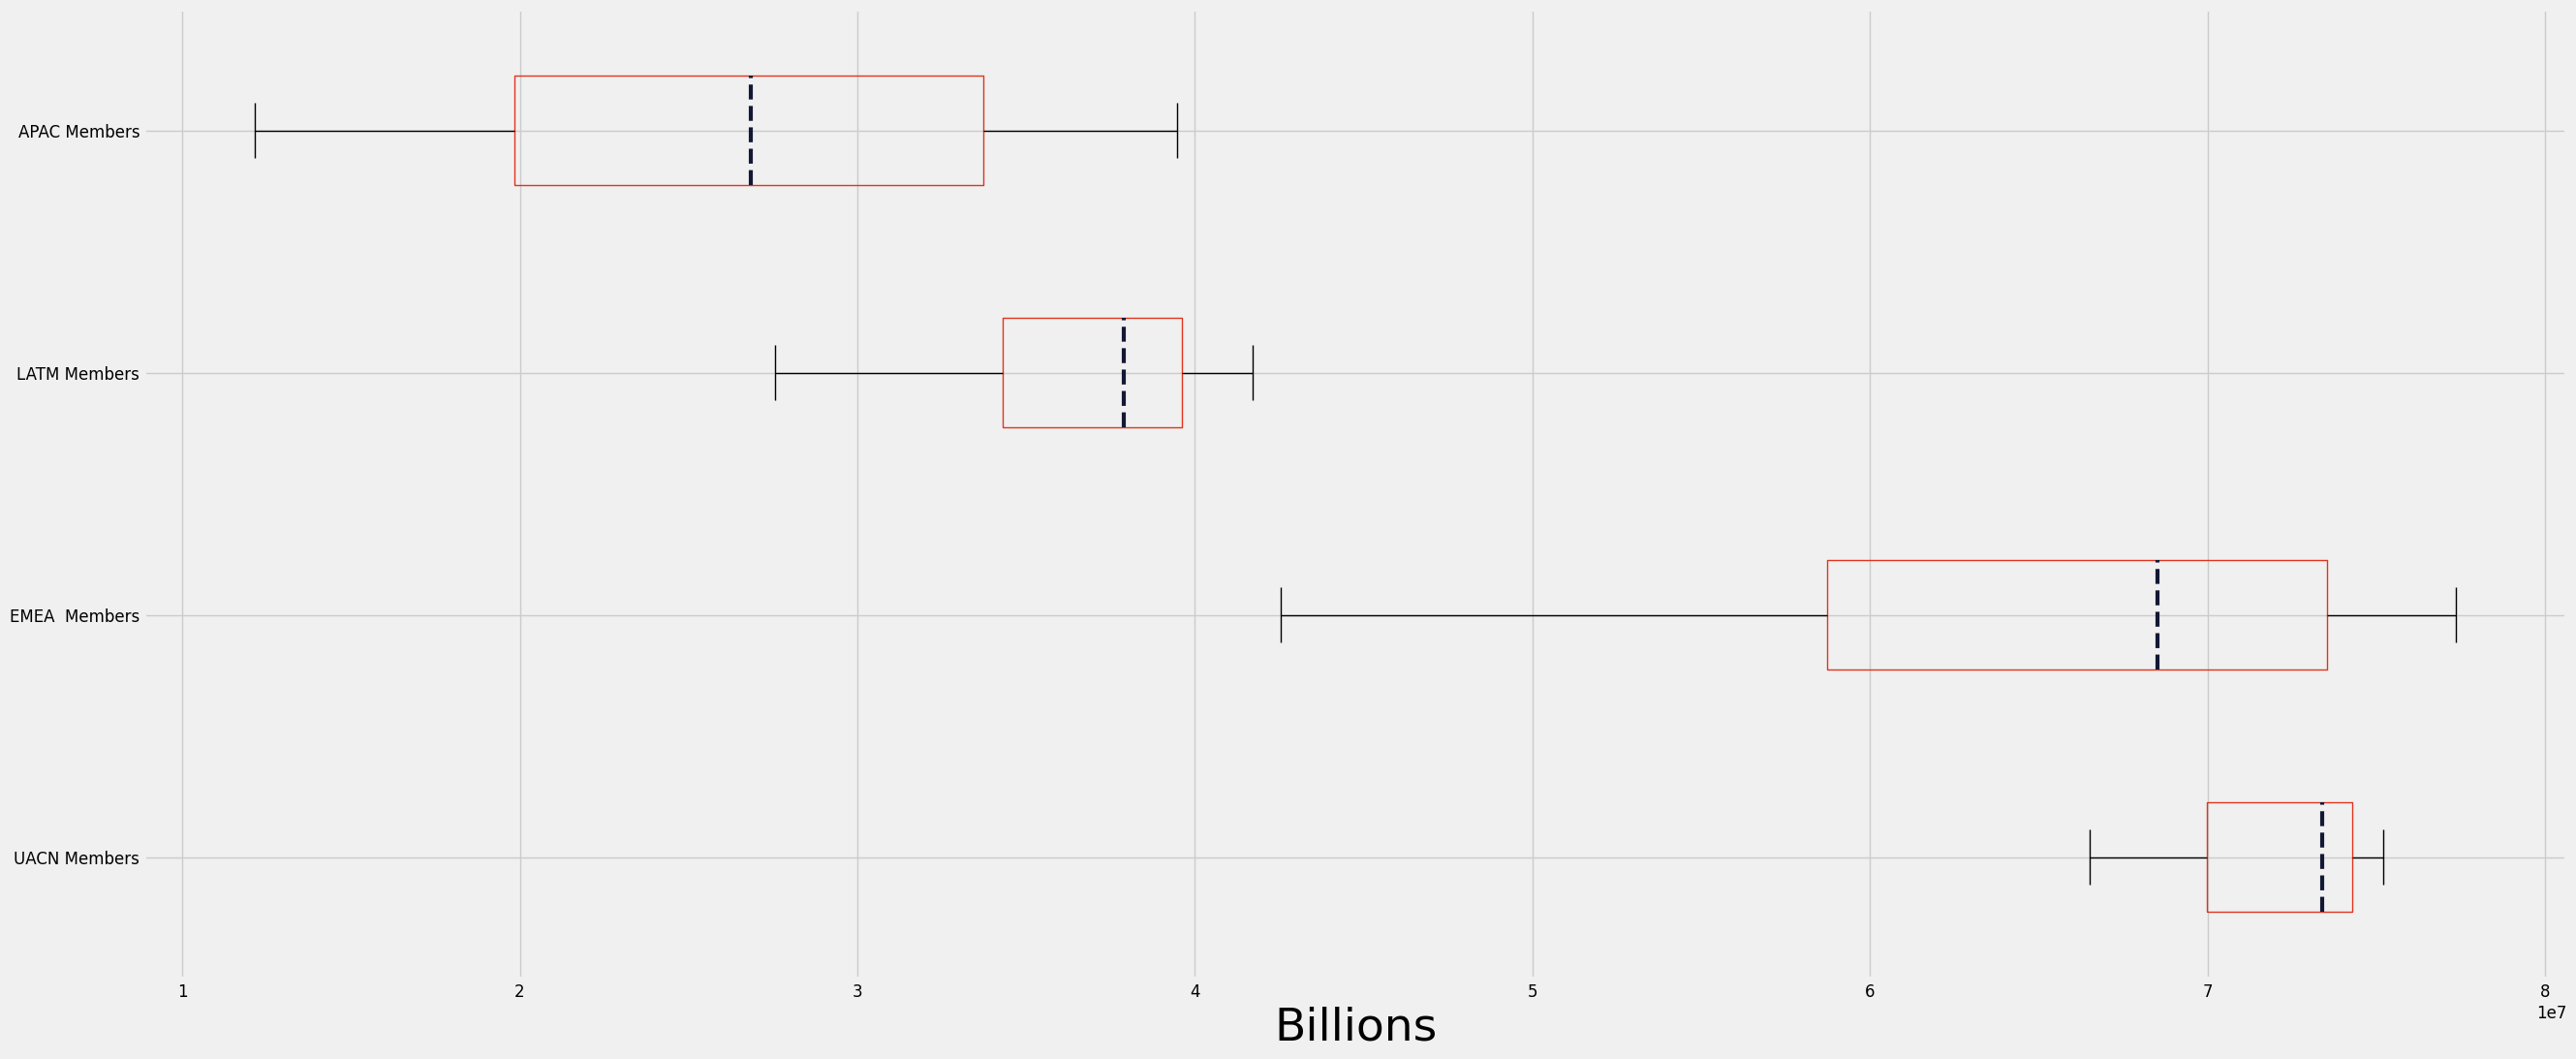

In [106]:
ap = dfm['UACN Members']
bp = dfm['EMEA  Members']
cp = dfm['LATM Members']
dp = dfm['APAC Members']
bp = [ap,bp,cp,dp]

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

medianprops = dict(linestyle='--', linewidth=3, color='#131834')
bbox_props = dict(color = "#E1341E" )

ax.set_yticklabels(['UACN Members','EMEA  Members','LATM Members','APAC Members'])
bpx = ax.boxplot(bp, vert=0, showfliers=True, medianprops=medianprops, boxprops=bbox_props)
plt.xlabel("Billions", fontsize=34)